Epoch: 1 | Error: 0.49999631285472124
Epoch: 100001 | Error: 0.011473483538320619
Epoch: 200001 | Error: 0.008022533019641495
Epoch: 300001 | Error: 0.006521462228433151

Final weights from Input → Hidden Layer:
 [[11.08727621  0.90180377 -7.03630795]
 [-5.56219402 -1.53810425 -7.38240283]]

Final weights from Hidden → Output Layer:
 [[-15.14025888]
 [ 28.55337481]
 [-24.25113548]]


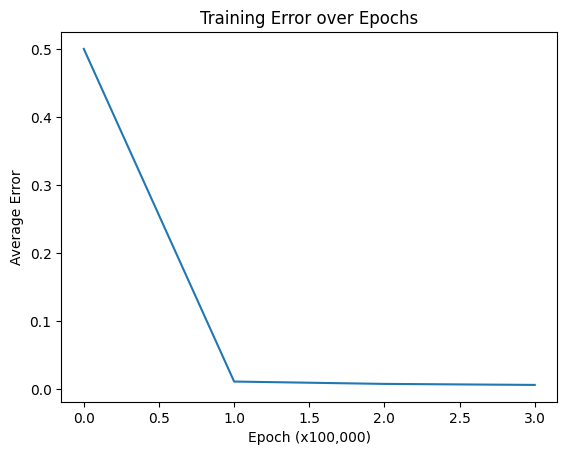


Expected Outputs:
 [[0]
 [1]
 [1]
 [0]]

Predicted Outputs after Training:
 [[0.00441199]
 [0.99314264]
 [0.99422975]
 [0.00549546]]

Testing the trained network:
[0, 0] → 0
[0, 1] → 1
[1, 0] → 1
[1, 1] → 0


In [1]:
# Unit 7 - Multi-Layer Perceptron
# ---------------------------------------------------------------

# Step 1: Import required library
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define activation function (Sigmoid) and its derivative
def sigmoid(x):
    # Sigmoid squashes any real number into a range between 0 and 1
    # Useful to represent neuron activation
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Derivative of sigmoid used to calculate how much to adjust weights during training
    return x * (1 - x)

# Step 3: Define the input (XOR input combinations)
inputs = np.array([
    [0, 0],   # Input 1
    [0, 1],   # Input 2
    [1, 0],   # Input 3
    [1, 1]    # Input 4
])

# Step 4: Define expected outputs for XOR
# XOR logic: 0⊕0=0, 0⊕1=1, 1⊕0=1, 1⊕1=0
outputs = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Step 5: Initialize weights randomly
# (input layer → hidden layer): 2 inputs → 3 neurons
# (hidden layer → output layer): 3 neurons → 1 output
weights_0 = 2 * np.random.random((2, 3)) - 1  # 2x3 matrix
weights_1 = 2 * np.random.random((3, 1)) - 1  # 3x1 matrix

# Step 6: Set hyperparameters
epochs = 400000          # Number of training iterations
learning_rate = 0.6      # Controls speed of learning
error_log = []           # To store error for visualization

# Step 7: Begin Training Loop
for epoch in range(epochs):
    # ---- Forward Propagation ----
    input_layer = inputs
    sum_synapse0 = np.dot(input_layer, weights_0)    # Input → Hidden weighted sum
    hidden_layer = sigmoid(sum_synapse0)             # Activation of hidden layer neurons

    sum_synapse1 = np.dot(hidden_layer, weights_1)   # Hidden → Output weighted sum
    output_layer = sigmoid(sum_synapse1)             # Activation of output neuron

    # ---- Error Calculation ----
    error_output_layer = outputs - output_layer      # Difference between expected & predicted
    avg_error = np.mean(np.abs(error_output_layer))  # Average absolute error (for display)

    # Print error every 100,000 epochs to monitor progress
    if epoch % 100000 == 0:
        print(f"Epoch: {epoch+1} | Error: {avg_error}")
        error_log.append(avg_error)

    # ---- Backpropagation ----
    # Step 1: Calculate gradient for output layer (using derivative)
    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output  # Adjustment for output layer

    # Step 2: Calculate gradient for hidden layer
    weights1_T = weights_1.T
    delta_output_weight = np.dot(delta_output, weights1_T)  # Backpropagate error to hidden layer
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

    # ---- Weight Updates ----
    # Hidden → Output weight update
    hidden_layer_T = hidden_layer.T
    input_x_delta1 = np.dot(hidden_layer_T, delta_output)
    weights_1 += input_x_delta1 * learning_rate  # Update output weights

    # Input → Hidden weight update
    input_layer_T = input_layer.T
    input_x_delta0 = np.dot(input_layer_T, delta_hidden_layer)
    weights_0 += input_x_delta0 * learning_rate  # Update hidden weights

# ---- Training Complete ----
# Final network weights after learning
print("\nFinal weights from Input → Hidden Layer:\n", weights_0)
print("\nFinal weights from Hidden → Output Layer:\n", weights_1)

# ---- Step 8: Visualize the Error Curve ----
plt.plot(error_log)
plt.title('Training Error over Epochs')
plt.xlabel('Epoch (x100,000)')
plt.ylabel('Average Error')
plt.show()

# ---- Step 9: Compare Predictions with True Outputs ----
print("\nExpected Outputs:\n", outputs)
print("\nPredicted Outputs after Training:\n", output_layer)

# Step 10: Function to Test New Inputs (Prediction)
def calculate_output(instance):
    # Forward pass for a single input
    hidden_layer = sigmoid(np.dot(instance, weights_0))
    output_layer = sigmoid(np.dot(hidden_layer, weights_1))
    return round(output_layer[0])  # Round to 0 or 1 for binary output

# Step 11: Test the network with XOR inputs
print("\nTesting the trained network:")
print(f"[0, 0] → {calculate_output(np.array([0, 0]))}")  # Expected 0
print(f"[0, 1] → {calculate_output(np.array([0, 1]))}")  # Expected 1
print(f"[1, 0] → {calculate_output(np.array([1, 0]))}")  # Expected 1
print(f"[1, 1] → {calculate_output(np.array([1, 1]))}")  # Expected 0
